# Continuous-time LQ-optimal control (regulation) on an infinite time interval

We consider an LTI state-space model, a quadratic cost function, and a fixed initial state. The goal is to bring the state towards the origin (we call this *regulation*). An infinite time interval $[0,\infty]$ is available - this is not to say that we do not care when the task is accomplished.

\begin{align*}
 \underset{\mathbf x(t),\mathbf u(t)}{\text{minimize}}&\quad\int_{0}^{\infty}\left[\mathbf x^\text{T}(t)\mathbf Q\mathbf x(t)+\mathbf u^\text{T}(t)\mathbf R\mathbf u(t)\right]\text{d}t\\
 \text{subject to}&\quad \dot{\mathbf x}(t)= \mathbf A\mathbf x(t)+ \mathbf B\mathbf u(t),\\
 &\quad \mathbf{x}(0) = \mathbf{r}_0.
\end{align*}

Steady-state solution to the differential Riccati eqution can found by solving Algebraic Riccati equation (ARE)

\begin{equation}\boxed{
 \mathbf 0=  \mathbf S \mathbf A + \mathbf A^\text{T} \mathbf S + \mathbf Q - \mathbf S\mathbf B\mathbf R^{-1}\mathbf B^\text{T} \mathbf S.}
\end{equation}

Then an LTI state feedback is given by

\begin{equation*}\boxed{
 \mathbf u(t) = -\underbrace{\mathbf R^{-1}\mathbf B^\text{T}\mathbf S}_{\mathbf K}\mathbf x(t).}
\end{equation*}

We are not going to implement our own solver for the continuous-time algebraic Riccati equation. Instead, we are going to use one implemented in [ControlSystems](https://github.com/JuliaControl/ControlSystems.jl) package. Alternatively, there is [MatrixEquations](https://github.com/andreasvarga/MatrixEquations.jl) package.

In [1]:
using ControlSystems
using LinearAlgebra # For identity matrix I

We build the system matrices

In [22]:
n = 2
m = 2

A = rand(n,n)
B = rand(n,m)
C = Matrix{Float64}(I, n, n)

2×2 Array{Float64,2}:
 1.0  0.0
 0.0  1.0

and define the `Q` and `R` weighting matrices for the LQR problem

In [23]:
Q = 100* Matrix{Float64}(I,n,n);
R = Matrix{Float64}(I, nu, nu);

In fact, the `ControlSystems` package contains a higher-level [lqr](http://juliacontrol.github.io/ControlSystems.jl/latest/lib/synthesis/#ControlSystems.lqr) function for computing the state-feedback gain directly

In [24]:
K = lqr(A,B,Q,R)

2×2 Array{Float64,2}:
 -1.40486  9.56843
 10.1694   2.52228

Now that we have the state-feedback gains, we can simulate the response. Usin the package, we can define a state-space model first

In [25]:
G = ss(A,B,C,0)

StateSpace{Float64,Array{Float64,2}}
A = 
 0.335594417745511   0.6055326142370221
 0.5073500788781355  0.03683555345764877
B = 
 0.05032808762066043  0.9525985945324567
 0.8169604008890095   0.40870671771764155
C = 
 1.0  0.0
 0.0  1.0
D = 
 0.0  0.0
 0.0  0.0

Continuous-time state-space model

In [31]:
and then define the state-feedback gain

LoadError: syntax: extra token "then" after end of expression

In [26]:
u(x,t) = -K*x

u (generic function with 1 method)

Specifying the time interval and the initial state

In [27]:
t = 0:0.1:5
x₀ = [1,3]

2-element Array{Int64,1}:
 1
 3

the response to the initial conditions can be simulated by

In [28]:
y, t, x, uout = lsim(G,u,t,x0=x₀)

([1.0 3.0; 0.12747573641957702 1.175814054544444; … ; 2.1650151481741636e-7 2.0600347713660948e-7; 7.363975322105894e-8 7.014071561688358e-8], 0.0:0.1:5.0, [1.0 3.0; 0.12747573641957702 1.175814054544444; … ; 2.1650151481741636e-7 2.0600347713660948e-7; 7.363975322105894e-8 7.014071561688358e-8], [-27.3004258777579 -17.73626617335605; -11.071607621149372 -4.26208943472246; … ; -1.6669750673587898e-6 -2.721293464088806e-6; -5.676828254951678e-7 -9.257881644459309e-7])

Plotting is then an easy task

In [29]:
using Plots, LaTeXStrings

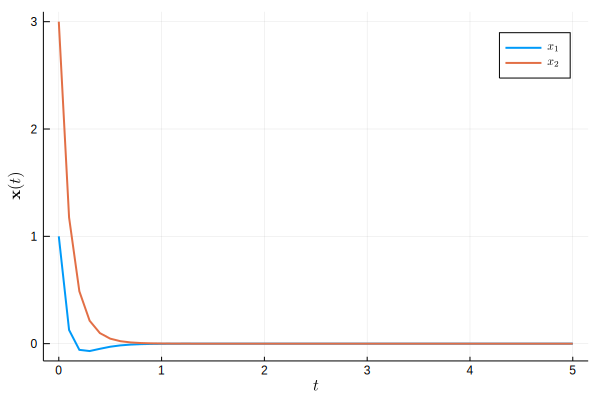

In [30]:
plot(t,x,xlabel=L"t",ylabel=L"\mathbf x(t)", label=[L"x_1" L"x_2"],linewidth=2)

## References

[1] Lewis, Frank, Draguna Vrabie, and Vassilis L. Syrmos. Optimal Control. 3rd edition. Hoboken: Wiley, 2012.

[2] Kirk, Donald E. Optimal Control Theory: An Introduction. Dover Publications, 2004.